# Using SVM for facial recognition

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=100, slice_=None)
faces.image = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(
    faces.images.shape[0], faces.images.shape[1] * faces.images.shape[2]
)

print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 125, 125)


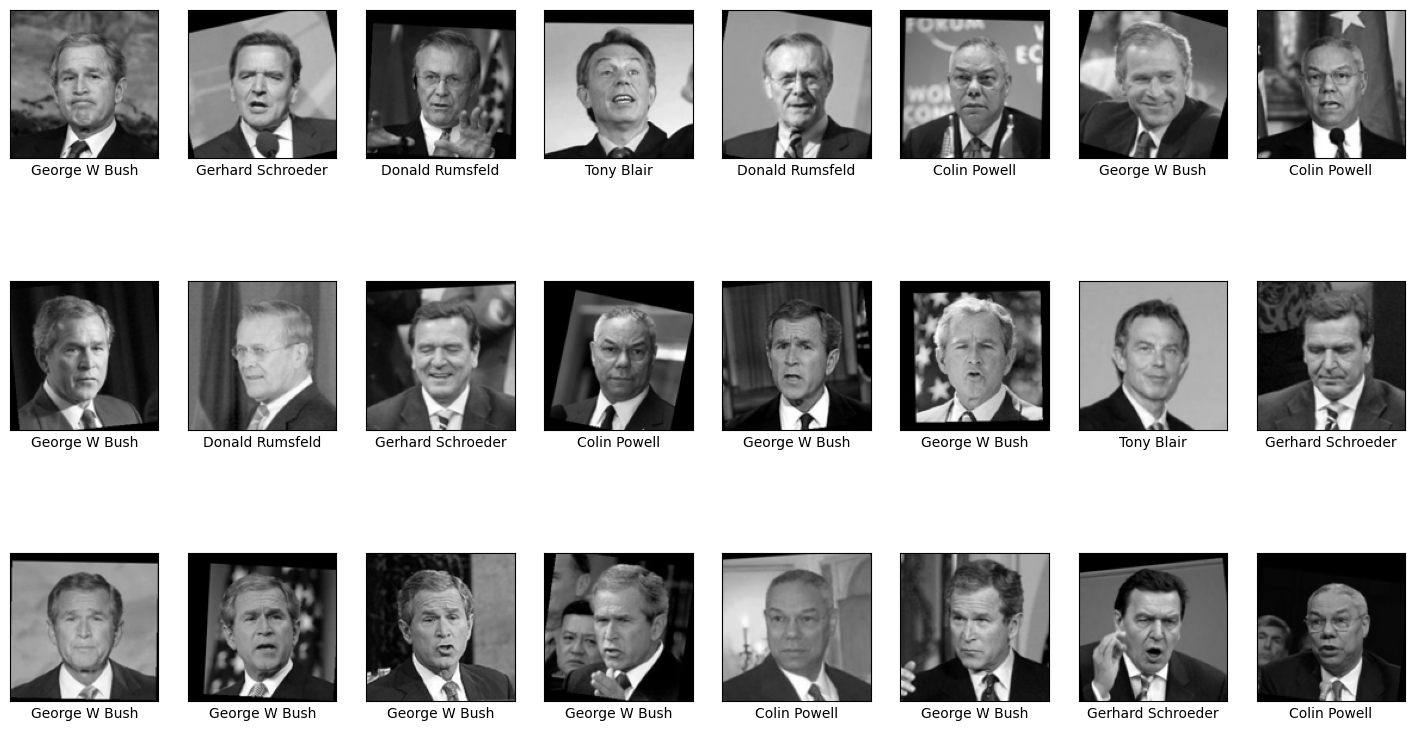

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 8, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap="gist_gray")
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

<Axes: >

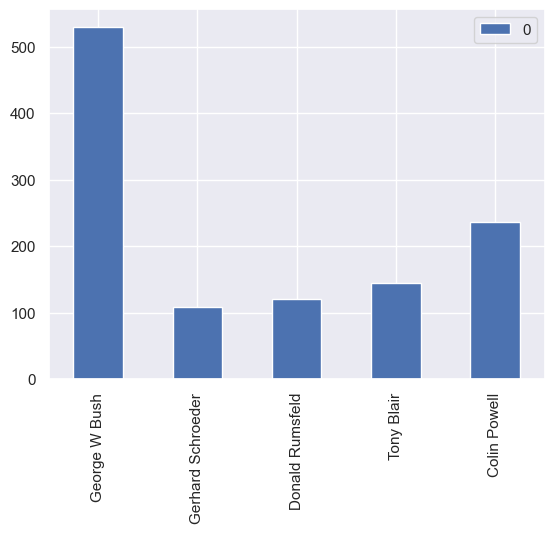

In [5]:
import seaborn as sns

sns.set()

from collections import Counter

counts = Counter(faces.target)
names = {}

for key in counts.keys():
    names[faces.target_names[key]] = counts[key]

df = pd.DataFrame.from_dict(names, orient="index")
df.plot(kind="bar")

In [7]:
mask = np.zeros(faces.target.shape, dtype=bool)

for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:100]] = 1

X = faces.data[mask]
y = faces.target[mask]
X.shape

(500, 15625)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC(kernel="linear")

grid = {"C": [0.1, 1, 10, 100]}

grid_search = GridSearchCV(estimator=svc, param_grid=grid, cv=5, verbose=2)
grid_search.fit(X, y)  # Train the model with different parameters.
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=   0.7s
[CV] END ..............................................C=0.1; total time=   0.6s
[CV] END ..............................................C=0.1; total time=   0.6s
[CV] END ..............................................C=0.1; total time=   0.6s
[CV] END ..............................................C=0.1; total time=   0.6s
[CV] END ................................................C=1; total time=   0.6s
[CV] END ................................................C=1; total time=   0.6s
[CV] END ................................................C=1; total time=   0.7s
[CV] END ................................................C=1; total time=   0.6s
[CV] END ................................................C=1; total time=   0.6s
[CV] END ...............................................C=10; total time=   0.6s
[CV] END ........................................

np.float64(0.734)

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
svc = SVC(kernel="linear")
pipe = make_pipeline(scaler, svc)
grid = {"svc__C": [0.1, 1, 10, 100]}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(X, y)
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................................svc__C=0.1; total time=   0.7s
[CV] END .........................................svc__C=0.1; total time=   0.6s
[CV] END .........................................svc__C=0.1; total time=   0.6s
[CV] END .........................................svc__C=0.1; total time=   0.6s
[CV] END .........................................svc__C=0.1; total time=   0.6s
[CV] END ...........................................svc__C=1; total time=   0.6s
[CV] END ...........................................svc__C=1; total time=   0.6s
[CV] END ...........................................svc__C=1; total time=   0.6s
[CV] END ...........................................svc__C=1; total time=   0.6s
[CV] END ...........................................svc__C=1; total time=   0.6s
[CV] END ..........................................svc__C=10; total time=   0.6s
[CV] END ........................................

np.float64(0.8140000000000001)

In [11]:
grid_search.best_params_

{'svc__C': 0.1}

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
svc = SVC(kernel="poly")
pipe = make_pipeline(scaler, svc)
grid = {
    "svc__C": [0.1, 1, 10, 100],
    "svc__gamma": [0.01, 0.25, 0.5, 0.75, 1],
    "svc__degree": [1, 2, 3, 4, 5],
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(X, y)
grid_search.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.7s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.6s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.6s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.6s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.6s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.6s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.6s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.6s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.7s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.6s
[CV] END ..........svc__C=0.1, svc__degree=1, svc__gamma=0.5; total time=   0.6s
[CV] END ..........svc__C=0.1, svc__degree=1, 

np.float64(0.8140000000000001)

In [13]:
grid_search.best_params_

{'svc__C': 0.1, 'svc__degree': 1, 'svc__gamma': 0.01}

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
svc = SVC(kernel="rbf")
pipe = make_pipeline(scaler, svc)
grid = {
    "svc__C": [0.1, 1, 10, 100],
    "svc__gamma": [0.01, 0.25, 0.5, 0.75, 1],
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(X, y)
grid_search.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.9s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.9s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.9s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.9s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.9s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.9s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.9s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.9s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.9s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.9s
[CV] END .........................svc__C=0.1, svc__gamma=0.5; total time=   0.9s
[CV] END .........................svc__C=0.1, s

np.float64(0.418)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, stratify=y, random_state=0
)

In [16]:
scaler = StandardScaler()
svc = SVC(kernel="linear", C=0.1)
pipe = make_pipeline(scaler, svc)
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear'))])

In [17]:
from sklearn.model_selection import cross_val_score

cross_val_score(pipe, X, y, cv=5).mean()

np.float64(0.8140000000000001)

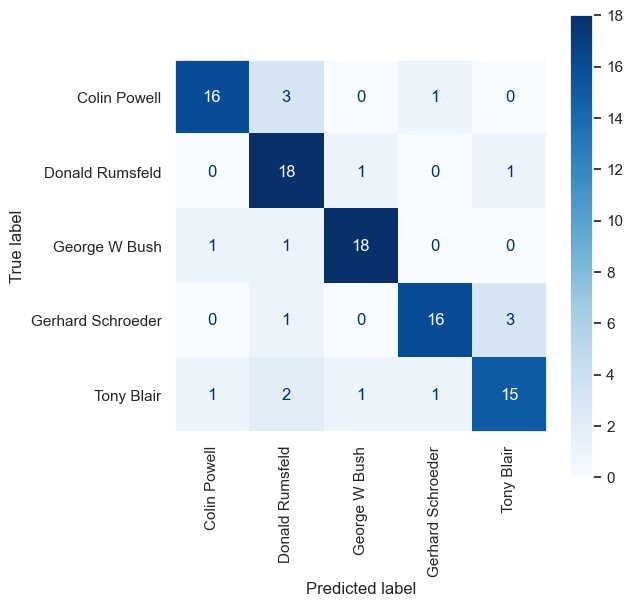

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(False)

cmd.from_estimator(
    pipe,
    X_test,
    y_test,
    display_labels=faces.target_names,
    cmap="Blues",
    xticks_rotation="vertical",
    ax=ax,
);